In [1]:
#init
from matplotlib import pyplot as pl 
import numpy as np
from numpy.linalg import eig
import math as math

#tweaks
a=1
pi = np.pi
I = 0+1j
N = 50 #Matrix truncation
G = 30 #should be less than N
C = 2*G
D = -I*G/pi

In [22]:
#plots
def plotenergies(E,x_lim,y_lim):
  E = np.real(E)
  l = len(E)
  Energy = np.sort(E)
  x=np.linspace(1,l,l)
  pl.xlabel("Eigenvalue Number") 
  pl.ylabel("Energies") 
  pl.xlim([0, x_lim])
  pl.ylim([0, y_lim])
  pl.scatter(x,Energy) 
  pl.show()
def plotdensities(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi = eigenstates(Matrix,N,steps,level)
    fig = pl.contour(x,x,np.square(np.abs(Psi)),500)

def plotdensities_Mobius(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Mobius = eigenstates_Mobius(Matrix,N,steps,level)
    fig = pl.contour(x,x,np.square(np.abs(Psi_Mobius)),500)

def plotdensities_Cylinder(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Cylinder = eigenstates_Cylinder(Matrix,N,steps,level)
    fig = pl.contour(x,x,np.square(np.abs(Psi_Cylinder)),500)

In [23]:
#square

#Auxiliary functions
def g_o(n,nn):
  if (n+nn)%2==0:
    value = 0
  else: 
    term1 = 1/(n-nn)**2
    term2 = 1/(n+nn)**2
    value = term1-term2
  return value

def g_e(n,nn):
  if (n+nn)%2==0:
    term1 = 1/(n-nn)**2
    term2 = 1/(n+nn)**2
    value = term1-term2
  else: 
    value = 0
  return value

def f_o(n,nn):
  if (n+nn)%2==0:
    value = 0
  else: 
    num = n*nn
    den = n**2-nn**2
    value = num/den
  return value

In [24]:
#4D hamiltonian matrix elements
def H_n_nn_m_mm(n,nn,m,mm):
    if mm==m:
        if nn==n:
            element = (n**2)+(m**2)+((G**2)/2)*((1/3)-((1/(pi*n))**2)-((1/(pi*m)**2)))
        else: 
            element = 2*(G/pi)**2*(g_e(n,nn))
    else: 
        if n==nn:
            element = 2*(G/pi)**2*(g_e(m,mm))
        else:
            element = -I*(16*G/(pi**3))*(g_o(n,nn)*f_o(m,mm)-g_o(m,mm)*f_o(n,nn))
    return element

H_n_nn_m_mm(1,1,1,1)

60.810934721896

In [25]:
#4D NxNxNxN matrix to 2D NxN matrix of 2D NxN matrices  N is the precission
def H_m_mm_Matrix(m,mm,N):
  H_block = np.zeros((N,N),dtype=complex)
  if m==mm:
    for n in range(N):
      H_block[n][n] = H_n_nn_m_mm(n+1,n+1,m+1,mm+1)
      for nn in range (N):
        H_block[n][nn] = H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  else: 
    for n in range(N):
      for nn in range(N):
        H_block[n][nn] = H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  return H_block

In [26]:
#Break blocks
def H_matrix(N):
    Zero = np.zeros((N,N),dtype = complex)
    H = [[Zero for _ in range(N)] for _ in range(N)] #NxN "matrix of matrices" of NxN zero matrices
    #fill upper triangular blocks and leave zeros everywhere
    for m in range(N):
      H[m][m] = H_m_mm_Matrix(m,m,N) #diagonal 
      for mm in range(m+1,N):
        H[m][mm] = H_m_mm_Matrix(m,mm,N) #upper triangle
    H = np.matrix(np.block(H)) #from block to matrix
    H_final = np.triu(H)+ np.tril(np.conj(H.T),-1) #Make Hermitian
    #quality control
    print(H_final)
    print(np.size(H_final,1))
    return H_final

In [58]:
def eigenstates(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = np.array([np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range (N)])
            Psi_x = np.array([np.sqrt(2)*np.sin((t+1)*pi*x[j]) for t in range (N)])
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out


In [28]:
#calculate
H = H_matrix(N)

[[  60.81093472+0.00000000e+00j    0.        +0.00000000e+00j
    34.19589948+0.00000000e+00j ...    0.        +8.79424449e-07j
     0.        +0.00000000e+00j    0.        +0.00000000e+00j]
 [   0.        +0.00000000e+00j   98.0068342 +0.00000000e+00j
     0.        +0.00000000e+00j ...    0.        +0.00000000e+00j
     0.        +8.62540075e-07j    0.        +0.00000000e+00j]
 [  34.19589948+0.00000000e+00j    0.        +0.00000000e+00j
   109.33940818+0.00000000e+00j ...    0.        +2.76513527e-06j
     0.        +0.00000000e+00j    0.        +9.58788671e-08j]
 ...
 [   0.        -8.79424449e-07j    0.        +0.00000000e+00j
     0.        -2.76513527e-06j ... 4953.96197289+0.00000000e+00j
     0.        +0.00000000e+00j   45.57554283+0.00000000e+00j]
 [   0.        +0.00000000e+00j    0.        -8.62540075e-07j
     0.        +0.00000000e+00j ...    0.        +0.00000000e+00j
  5050.96277238+0.00000000e+00j    0.        +0.00000000e+00j]
 [   0.        +0.00000000e+00j    0.   

In [29]:
#solve matrix
E, V = eig(H)

In [32]:
index = np.argsort(np.real(E))
print(index)

[423 425 470 ...   1   0   2]


In [40]:
C = V[:,index]

In [34]:
A = (C[:,1])
print(C[:,1],np.size(2))

[-1.41818563e-06-1.83940199e-08j -3.63776424e-01-1.82936717e-09j
  4.67695628e-07-2.80244609e-07j ...  2.56311227e-16-4.14963106e-16j
  2.49897658e-17-4.47649818e-11j  1.78471051e-16-2.58157671e-16j] 1


In [43]:
D = np.sort(E)

In [44]:
print(D[470])

(631.9264043334526+5.375259817632014e-14j)


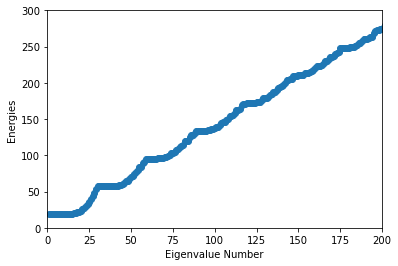

In [45]:
#print & plot
plotenergies(D,200,300)

In [56]:
plotdensities(C,N,200,0)

NameError: name 'eigenstates' is not defined

In [70]:
#auxiliary functions
def oscMOB(m,mm):
  k = m+mm
  num = -I*(4*(G**2))*(2+((-1)**k)*((-1+I)+pi*(m-mm))*(1+I)+pi*(m-mm))
  den = ((m-mm)**3)*(pi**3)
  out = num/den
  return out
def angMOBmequal(m,n,nn):
  if (nn+n)%2==0:
    out = 0
  else: 
    num = I*((-8*G)/(pi))*(n*nn)
    den = n**2-nn**2
    out = num/den
  return out
def angMOBmdifferent(m,mm,n,nn):
    num = 2*angMOBmequal(m,n,nn)*(2+I*pi*(mm-m))
    den = ((m-mm)**2)*pi**2
    out = num/den
    return out

In [71]:
#4D  Möbius Hamiltonian matrix elements
def Mobius_H_n_nn_m_mm(n,nn,m,mm):
    if mm==m:
        if nn==n:
            element = (n**2)+(m**2)+(4/3)*(G**2)
        else: 
            element = angMOBmequal(m,n,nn)
    else: 
        if n==nn:
            element = oscMOB(m,mm)
        else:
            element = angMOBmdifferent(m,mm,n,nn)
    return element

In [72]:
#4D NxNxNxN matrix to 2D NxN matrix of 2D NxN matrices  N is the precission
#n-nn position is occupied by an even or odd number given by the parity of m and mm
def H_m_mm_Mobius_Matrix(m,mm,N):
  H_block = np.zeros((N,N),dtype=complex)
  if m==mm:
    if (m+1)%2==0:
      for n in range(N):
        H_block[n][n] = Mobius_H_n_nn_m_mm((2*(n+1))+1,2*(n+1)+1,m+1,mm+1)
        for nn in range (N):
          H_block[n][nn] = Mobius_H_n_nn_m_mm((2*(n+1))+1,2*(nn+1)+1,m+1,mm+1)
    else:
      for n in range(N):
        H_block[n][n] = Mobius_H_n_nn_m_mm(2*(n+1),2*(n+1),m+1,mm+1)
        for nn in range (N):
          H_block[n][nn] = Mobius_H_n_nn_m_mm(2*(n+1),2*(nn+1),m+1,mm+1)
  else: 
      if (m+1)%2==0:
        if (mm+1)%2==0:
          for n in range(N):
            H_block[n][n] = Mobius_H_n_nn_m_mm(2*(n+1)+1,2*(n+1)+1,m+1,mm+1)
            for nn in range (N):
              H_block[n][nn] = Mobius_H_n_nn_m_mm(2*(n+1)+1,2*(nn+1)+1,m+1,mm+1)
        else: 
          for n in range(N):
            H_block[n][n] = Mobius_H_n_nn_m_mm(2*(n+1),2*(n+1),m+1,mm+1)
            for nn in range (N):
              H_block[n][nn] = Mobius_H_n_nn_m_mm(2*(n+1),2*(nn+1),m+1,mm+1)
      else:
        if (mm+1)%2==0:
          for n in range(N):
            H_block[n][n] = Mobius_H_n_nn_m_mm(2*(n+1),2*(n+1)+1,m+1,mm+1)
            for nn in range (N):
              H_block[n][nn] = Mobius_H_n_nn_m_mm(2*(n+1),2*(nn+1)+1,m+1,mm+1)
        else: 
          for n in range(N):
            H_block[n][n] = Mobius_H_n_nn_m_mm(2*(n+1),2*(n+1),m+1,mm+1)
            for nn in range (N):
              H_block[n][nn] = Mobius_H_n_nn_m_mm(2*(n+1),2*(nn+1),m+1,mm+1)
  return H_block

In [73]:
#Break blocks for Möbius Matrix
def H_Mobius_matrix(N):
    Zero = np.zeros((N,N),dtype = complex)
    H_Mobius = [[Zero for _ in range(N)] for _ in range(N)] #NxN "matrix of matrices" of NxN zero matrices
    #fill upper triangular blocks and leave zeros everywhere
    for m in range(N):
      H_Mobius[m][m] = H_m_mm_Mobius_Matrix(m,m,N) #diagonal 
      for mm in range(m+1,N):
        H_Mobius[m][mm] = H_m_mm_Mobius_Matrix(m,mm,N) #upper triangle
    H_Mobius = np.matrix(np.block(H_Mobius)) #from block to matrix
    H_final = np.triu(H_Mobius)+ np.tril(np.conj(H_Mobius.T),-1) #Make Hermitian
    #quality control
    print(H_final)
    print(np.size(H_final,1))
    return H_final

In [74]:
H_Mobius = H_Mobius_matrix(N)

[[ 1.20500000e+03+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j         ... -2.04733232e-02+0.00026599j
  -2.00593795e-02+0.00026062j -1.96618493e-02+0.00025545j]
 [ 0.00000000e+00+0.j          1.21700000e+03+0.j
   0.00000000e+00+0.j         ... -4.09989576e-02+0.00053267j
  -4.01679593e-02+0.00052187j -3.93700298e-02+0.0005115j ]
 [ 0.00000000e+00+0.j          0.00000000e+00+0.j
   1.23700000e+03+0.j         ... -6.16296611e-02+0.00080071j
  -6.03753428e-02+0.00078441j -5.91712376e-02+0.00076877j]
 ...
 [-2.04733232e-02-0.00026599j -4.09989576e-02-0.00053267j
  -6.16296611e-02-0.00080071j ...  1.31090000e+04+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j        ]
 [-2.00593795e-02-0.00026062j -4.01679593e-02-0.00052187j
  -6.03753428e-02-0.00078441j ...  0.00000000e+00+0.j
   1.35010000e+04+0.j          0.00000000e+00+0.j        ]
 [-1.96618493e-02-0.00025545j -3.93700298e-02-0.0005115j
  -5.91712376e-02-0.00076877j ...  0.00000000e+00+0.j
   0.00000000e+00+0.j        

In [86]:
H_Mobius[10]

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        , ..., -0.2373185 +0.0030833j ,
       -0.23202095+0.00301447j, -0.22696415+0.00294877j])

In [75]:
#Verify Hermiticity
H_Mobius-np.conj(H_Mobius.T)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [76]:
#solve matrix 
E_Mobius, V_Mobius = eig(H_Mobius)

In [10]:
print(E_Mobius) 

[16802.85459791+1.36959111e-12j 15858.61424339+2.75442658e-13j
 15276.04745472-7.06453283e-13j ...  3534.19764894-5.02539262e-13j
  3536.99569479-1.97245784e-13j  3442.61236014+3.26044760e-13j]


In [11]:
EE=np.real(E_Mobius)
print(EE)

[16802.85459791 15858.61424339 15276.04745472 ...  3534.19764894
  3536.99569479  3442.61236014]


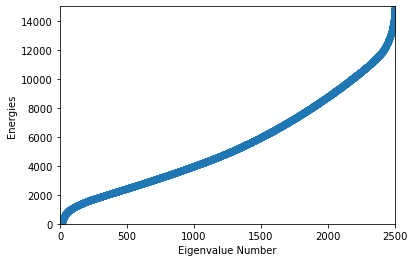

In [12]:
#print & plot
plotenergies(EE,2500,15000) 

In [134]:
def oddonly(Matrix):
    N = np.size(Matrix,1)
    MMatrix = np.zeros([N,2*N], dtype = complex)
    for i in range(N):
        for j in range(N):
            if i%2==0:
                MMatrix[i,2*j+1] = Matrix[i,j]
            else:
                MMatrix[i,2*j] = Matrix[i,j]
    return MMatrix

In [135]:
OV = oddonly(np.zeros([N,N], dtype = complex))

In [136]:
print(np.size(OV,1))

100


In [137]:
Psi_yy = [np.sqrt(2)*np.sin((t+1)*pi*0.5) for t in range(2*N)]
print(np.size(Psi_yy))

100


In [138]:
def eigenstates_Mobius(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex)
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    MMatrix = oddonly(Matrix)
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range(2*N)]
            Psi_x = [np.cos((t+2)*pi*x[j])+np.sin((t+2)*pi*x[j])*I for t in range(N)]
            A = np.matmul(MMatrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [118]:
index = np.argsort(np.real(EE))
print(index)

[ 63 104 105 ...   2   1   0]


In [106]:
C_Mobius = V_Mobius[:,index]

In [ ]:
D_Mobius = np.sort(EE)

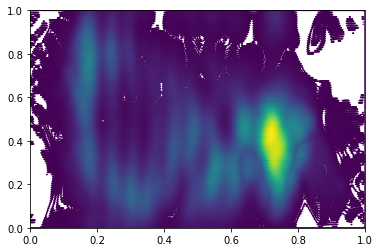

In [141]:
plotdensities_Mobius(C_Mobius,N,200,0)

In [27]:
def oscCYL(m,mm):
  Constant = 2*(G**2)/(pi**2)
  num = (1-I*(m-mm)*pi)
  den = (m-mm)**2
  out = Constant*(num/den)
  return out

def Cyl_O(n,nn): #only odd contributions
  if (n+nn)%2==1:
    num = -(8*G/(pi**2))*n*nn
    den = (n**2-nn**2)
    out = num/den
  else: 
    out = 0
  return out

In [29]:
 #4D  Möbius Hamiltonian matrix elements
def Cylinder_H_n_nn_m_mm(n,nn,m,mm):
    if mm==m:
        if nn==n:
            element = (n**2)+((2*m)**2)+(4/3)*(G**2)
        else: 
            element = Cyl_O(n,nn)*I
    else: 
        if n==nn:
            element = oscCYL(m,mm)
        else:
            element = Cyl_O(n,nn)*(1/(m-mm))
    return element

In [30]:
#4D NxNxNxN matrix to 2D NxN matrix of 2D NxN matrices  N is the precission
#n-nn position is occupied by an even or odd number given by the parity of m and mm
def H_m_mm_Cylinder_Matrix(m,mm,N):
  H_block = np.zeros((N,N),dtype=complex)
  if m==mm:
    for n in range(N):
      H_block[n][n] = Cylinder_H_n_nn_m_mm(n+1,n+1,m+1,mm+1)
      for nn in range (N):
        H_block[n][nn] = Cylinder_H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  else: 
    for n in range(N):
      for nn in range(N):
        H_block[n][nn] = Cylinder_H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  return H_block

In [31]:
#Break blocks for Möbius Matrix
def H_Cylinder_matrix(N):
    Zero = np.zeros((N,N),dtype = complex)
    H = [[Zero for _ in range(N)] for _ in range(N)] 
    #NxN "matrix of matrices" of NxN zero matrices
    #fill upper triangular blocks and leave zeros everywhere
    for m in range(N):
      H[m][m] = H_m_mm_Cylinder_Matrix(m,m,N) 
      #diagonal 
      for mm in range(m+1,N):
        H[m][mm] = H_m_mm_Cylinder_Matrix(m,mm,N) 
        #upper triangle
    H = np.matrix(np.block(H)) 
    #from block to matrix
    H_final = np.triu(H)+ np.tril(np.conj(H.T),-1) 
    #Make Hermitian
    #quality control
    print(H_final)
    print(np.size(H_final,1))
    return H_final

In [32]:
H_Cylinder = H_Cylinder_matrix(N)

[[ 1.20500000e+03  +0.j          0.00000000e+00 +16.21138938j
   0.00000000e+00  +0.j         ... -1.03433856e-02  +0.j
   0.00000000e+00  +0.j         -9.92931216e-03  +0.j        ]
 [ 0.00000000e+00 -16.21138938j  1.20800000e+03  +0.j
   0.00000000e+00 +29.18050089j ...  0.00000000e+00  +0.j
  -2.02895987e-02  +0.j          0.00000000e+00  +0.j        ]
 [ 0.00000000e+00  +0.j          0.00000000e+00 -29.18050089j
   1.21300000e+03  +0.j         ... -3.11383229e-02  +0.j
   0.00000000e+00  +0.j         -2.98836023e-02  +0.j        ]
 ...
 [-1.03433856e-02  +0.j          0.00000000e+00  +0.j
  -3.11383229e-02  +0.j         ...  1.35040000e+04  +0.j
   0.00000000e+00+589.6266159j   0.00000000e+00  +0.j        ]
 [ 0.00000000e+00  +0.j         -2.02895987e-02  +0.j
   0.00000000e+00  +0.j         ...  0.00000000e+00-589.6266159j
   1.36010000e+04  +0.j          0.00000000e+00+601.78642406j]
 [-9.92931216e-03  +0.j          0.00000000e+00  +0.j
  -2.98836023e-02  +0.j         ...  0.0000

In [35]:
H_Cylinder-np.conj(H_Cylinder.T)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [36]:
#solve matrix
E_Cylinder, V_Cylinder = eig(H_Cylinder)
print(E_Cylinder)

[17325.12934337-1.25445251e-12j 17016.47483444-2.80310653e-13j
 16720.76038469+7.60219209e-14j ...  3142.82526739+4.53981999e-13j
  3144.27022938-2.63314121e-13j  3145.38925345+6.14925826e-14j]


In [37]:
EE_Cylinder = np.real(E_Cylinder)
print(EE_Cylinder)

[17325.12934337 17016.47483444 16720.76038469 ...  3142.82526739
  3144.27022938  3145.38925345]


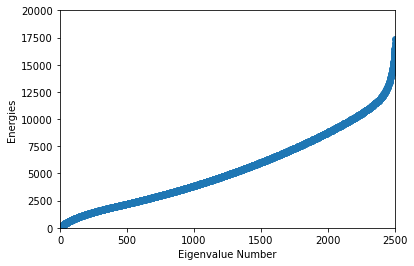

In [39]:
#print & plot
plotenergies(EE_Cylinder,2500,20000) 

In [46]:
def eigenstates_Cylinder(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range(N)]
            Psi_x = [np.cos(2*(t+1)*pi*y[k])+np.sin(2*(t+1)*pi*y[k])*I for t in range(N)]
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [41]:
index_Cylinder = np.argsort(np.real(E_Cylinder))
print(index_Cylinder)

[203 204 205 ...   2   1   0]


In [42]:
C_Cylinder = V_Cylinder[:,index]

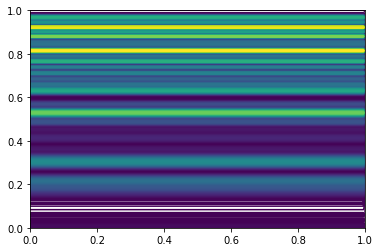

In [55]:
plotdensities_Cylinder(C_Cylinder,N,200,0)